# Model validation altimetry

Note: this notebook requires the model output data

In [22]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h

In [23]:
obs_fldr = "../observations/" 
mr_fldr = "../output_sample/"     # replace with "../output/" after download
mr_fn = f"{mr_fldr}Area.dfsu"

In [24]:
altlist = h.get_altimetry_obs(quality=None)

In [25]:
mr = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr

<DfsuModelResult>: MIKE21
Time: 2023-12-01 00:00:00 - 2023-12-08 00:00:00
Quantity: Surface Elevation [m]

In [26]:
cmps = []
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time="2023"), mod=mr)
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3a...
Processing 3b...
list index out of range
Processing 6a...
Processing c2...
list index out of range
Processing j2...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing j3...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing sa...


In [27]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,3,-0.0,0.0149,0.0149,0.0124,0.8845,0.0387,-4.8452
6a,3,0.0,0.0109,0.0109,0.0103,0.9410,0.0245,0.5803
sa,3,0.0,0.0069,0.0069,0.0059,0.8433,0.0155,0.4815


In [ ]:
cc.plot.scatter();

IndexError: Id 3 is out of range for ['3a', '6a', 'sa']

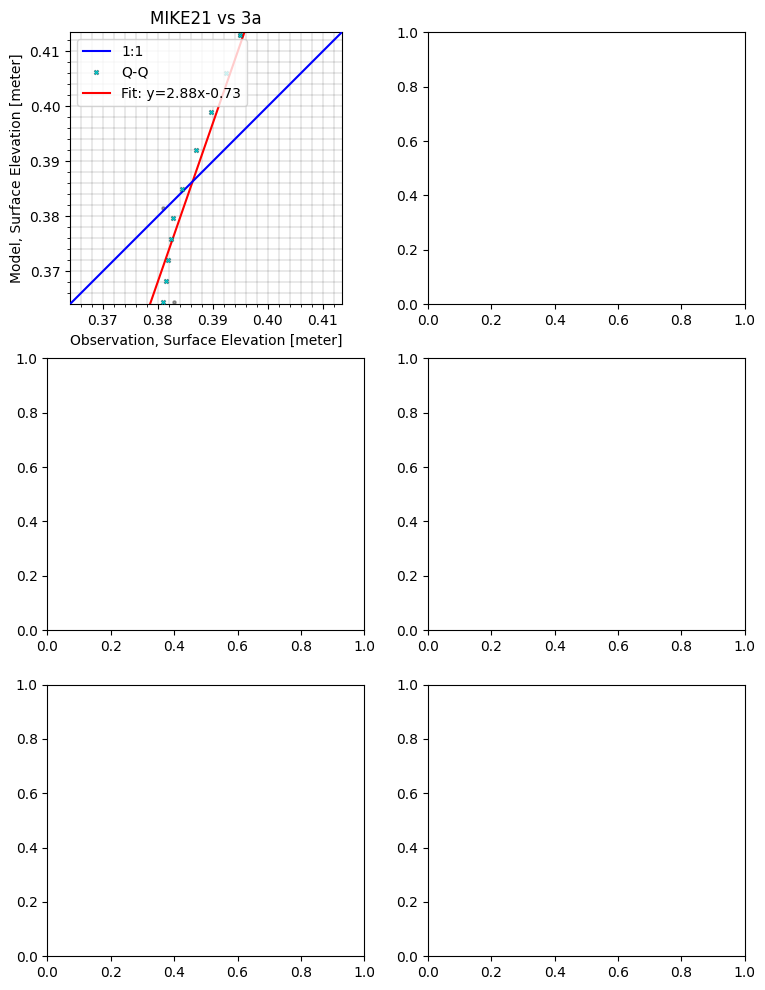

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(9,12))
for i in range(3):
    cc[i].sel().plot.scatter(ax=axs[i,0], show_density=False)
    cc[i+3].sel().plot.scatter(ax=axs[i,1], show_density=False)
plt.tight_layout()
plt.show()